In [ ]:

!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=cbe6a68d3ae354c166c798129126b34e001981bbae5c6bc20c0337be1cc35355
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


5 -8.018809653605734 0.5223357979928904
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.9921   
1            1             3.0              0.9943   
2            2             1.0              0.9960   
3            3             2.0              0.9921   
4            4             4.0              0.9967   
5            5             2.0              0.9943   
6            6             0.0              0.9950   
7            7             1.0              0.9960   
8            8             0.0              0.9934   
9            9             1.0              0.9960   

                                            Keywords  \
0  covid, pandemi, vaksinasi, mudik, laku, masyar...   
1  covid, cara, bripka, masyarakat, taat, daftar,...   
2  covid, jaga, vaksin, tular, polri, cegah, ayo,...   
3  covid, pandemi, vaksinasi, mudik, laku, masyar...   
4  covid, vaksinasi, covid19, warga, jangan, vaks...   
5  covid, pandemi, vaksinasi,

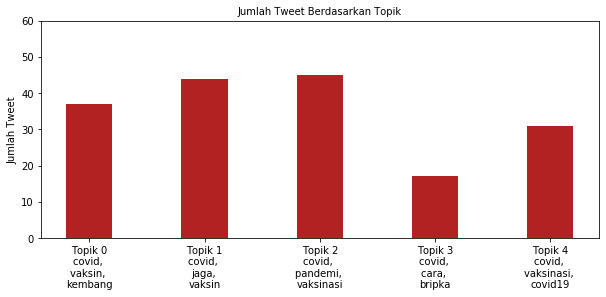

In [19]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
kawal yuk teman2 medical beau
update kasus covid-19 indonesia kamis 25 maret 2021 via
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
negative report mandatory for entering bengaluru from april 1
kalo mimpi ketemu toilet jangan coba masuk deh kalo udah lanjur masuk jangan coba nerusin seriu
akhbar pilih harga jatuh sindiket gelojoh baca lanjut pa
update data kembang virus corona covid-19 25 maret 2021 satgascovid19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
travelling to bengaluru from punjab chandigarh negative covid-19 report must
instruksi bupati sleman baru guru tinggi selenggara kuliah tatap muka masa pandemi
pt angkasa pura i persero selenggara vaksinasi covid-19 hadap 856 covid19
hari banyak 16 juta bahan baku vaksin covid-19 merk coronavac buat sinovac biotech tiba indonesia
pemkot jogja tengah susun ulang atur kait giat ajar ajar kbm tatap muka covid19
hingga ini 25 dagang malioboro ikut vaksinasi covid-19 covid19
perempuan lebih mungkin alami efek samping terima vaksin covid-19 banding laki
lap kluster baharu kes hari masuk tujuh libat tempat kerja - kp kesihatan
covid-19 in karnataka rt-pcr negative certificates mandatory for people coming to bengaluru bsybjp
gaiter loops auaaq balaclava bandanas - coronavirus
lanjut ica hari mertua vaksinasi alami stroke kondisi rahang miring ki
rektor unp positif covid-19 vaksinasi intensif kampus air tawar
status kini task force operasi patuh pdrm baca lanjut paut
ki ni mangwani yh py paisa lga k awam ko shifa dna ha aur
public speaking butuh sampai informasi cara efisien akurat efektif dengar mampu menangk
suntik 9 juta vaksin covid-19 wamenkes dampak lihat - beritasatu
pasien covid-19 rawat rsd wisma atlet mayor per 25 maret 2021 -
bansos covid-19 kpk panggil sekjen kemensos dirjen linjamsos - - nasional
tahun the media hotel and towers jadi posko tenaga medis covid-19 -
patut syukur indonesia cepat vaksin covid-19 - - nasional
catat angka mati hari tinggi akibat covid-19 - - pikir rakyat
budi bicara soal khawatir vaksinasi covid - cnbc indonesia
tangan covid-19 mungkin besar mudik lebaran larang - bisnis
covid-19 akibat senjang sosial perempuan makin nyata -
vaksin covid-19 tahap tujuh - beritasatu
klaim indonesia registrasi obat covid-19 buat 4 hari sembuh -
covid b117 duga masuk garut -
mutasi ganda covid-19 temu india - okezone
3 upaya ojk tangan dampak pandemik covid-19 -
aktor bollywood aamir khan positif covid-19 -
vaksinasi covid dagang pasar jemput paksa tenaga sehat polisi - inews
wna vaksinasi covid-19 sanur bal pakai vaksin astrazeneca - jawa pos
vaksinasi covid-19 tni al tahap akhir jakarta -
tim grup b piala menpora jalan vaksinasi covid-19 -
malioboro ingat jalan vaksinasi covid-19 -
wakil bupati mamuju telat vaksin covid-19 - -
modus tipu lowong kerja bayar tengah pandemi covid-19 - okezone
mark sungkar positif covid-19 - inews
sedia layan vaksin covid-19 klinik pratama makmur jaya ciputat pamulang bintaro isi data pad
kerala
kenya
segera daftar kuota 300 ribu prakerja
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
program imunisasi covid-19 bangsa tan sri dato haji muhyiddin bin haji muhammad yassin perdana menteri malay
innahhh da
lansia jangan takut vaksin warga bogor usia 104 tahun sehat pasca suntik vaksin
mantap 16 juta dosis vaksin covid sinovac tiba tanah air vaksin
umbono lingayekethisi icovid-19 isesekhona
umum panjang ppkm mikro sesuai instruksi gubernur diy no 8 instr 2021 ppkm mikro panjang m
panjang ppkm mikro brebes laku 5 april 2021 ppkm
seni hibur boleh laksana buah hajat giat sosial masyarakat adala
wakil presiden ma ruf amin imbau masyarakat jalan ibadah rumah lama ramadan langkah harus
italia vs irlandia utara tak gentar sama badai corona italy
laksana sambang pos sarlinmas pantai congot kulonprogo personel ditpolair polda diy ajak tugas untu
kapolda diy irjen pol drs asep suhendar hadir tanding pertama piala menpora
kamu malas hanya buang buang waktu kamu tak tahu bagaimana cara raih peluang bahkan pel
survei idm pepet pdip golkar kian moncer jelang milu 2024 fraksigolkar
ratus napi nusakambangan positif covid-19 isolasi lapas via
tahan lama pandemi bappenas dorong usaha laku digitalisasi bappenasri
vaksin covid-19 anak tunggu rekomendasi vaksin
sambang kawasan toko jl am sangaji jetis kota yogyakarta personel patroli polsek jetis polresta yogyakar
nu harap semua orang mau vaksin nahdlatululama
prokes 5m dagang unjung pasar bagi masker giat bagai upaya mendi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
naik 0 09 usd 1 182 gerak turun dorong tunda amp gelombang 3 m
us index naik 0 03 level 92 55 ini di level tinggi akibat optimisme ak
di-pertuan agong zahir rasa bangga warga pdrm atas korban bagai tugas baris hadap
katno had dukung sukses program vaksin covid-19
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
top news koran rakyat merdeka vaksinasi covid juta hari mimpi jokowi
sobat polri ayo cegah tular covid-19 jaga jarak kita hindar virus covid-19
vaksin astrazeneca selamat di malaysia
top news koran rakyat merdeka ragu terap protokol sehat jaga pemprov tolak buka 26 tempat karaoke
polri ayo cegah tular covid-19 jaga jarak a
top news koran rakyat merdeka bule langgar prokes bal dah langsung pulangin negara asal aja bal
top news koran rakyat merdeka soal sekolah tatap muka putus pekan depan satgascovid19
update data covid19 sulawesi barat tanggal 24 maret 2021 total sulbar positif 5358 sembuh 4980 tinggal 1
taat prokes keren jauh kerumun kurang mobilitas polresjogja
update kasus per tanggal 9 april 2021 website
personel jaga pos polairud congot bripka catur widodo s h sama bripka agung h hadir panen raya kete
kisne kaha tha 2021 me shadiyan km hongi ek bar lockdown hone do taara chadne wala hai covid
330 perosonil polres vaksin kunjung
patuh protokol sehat 5m polresjogja
tetep gumegrah ojo serah bebarengan lawan covid-19 kanthi patuh protokol sehat 5m polresjogja
pakai masker lindung virus covid-19 polresjogja
kini task force operasi patuh pdrm baca lanjut paut
salam santun sebar kasus positif covid-19 indonesia per tgl 09 apr
19 yongereye ihungabana mu barokotse jenoside mu
sapa masyarakat jumpa tidak lupa himbauan kamtibmas protokol sehat
akibat makin kembang teknologi ini individualisme makin jamur hati tiap orang
sobat jak moga semua segera gilir vaksinasi covid-19 ingat atau ses
perintah terap bijak kendali pandemi pulih ekonomi cara imbang
update data kembang virus corona covid-19 9 april 2021 satgascovid19
in ai tempi del
kait temu varian baru covid-19 e484k satgas minta warga tak panik via
plaza tawar layan medical check up screening covid-19 -
ji ah beri sumbang para siswa dampak pandemi covid-19 - -
kurang negara dunia rebut vaksin lawan covid-19 - internasional kontan
juang tes covid sulit cari pcr murah kualitas -
warga laku ziarah kubur tpu khusus jenazah covid-19 -
pegawai positif covid-19 bank sumut cabang tebing tinggi tutup -
covid-19 mantan gubernur sumsel mahyudin tinggal dunia -
hari covid-19 aceh tingkat positif baru 42 orang -
transparansi sedia informasi vaksinasi covid-19 - viva -
luncur produk baru proteksi covid-19 bantu tangan pandemi - kontan
protokol covid maling mobil bikin polisi jadi bahan cemooh -
sekolah tatap muka 10 000 lebih guru tangerang vaksin covid - inews
sepeda aman lama pandemi covid-19 - medcom id
yogyakarta wajib bawa hasil tes covid-19 - kompas tv
luncur program masjid jadi sentra vaksin covid-19 - republika online
psk brasil laku demo harus prioritas vaksin covid-19 - kompas tv
wajo kurang 23 ribu vaksin covid-19 - sindonews makassar
pemkot tangerang tetap vaksinasi covid-19 lama ramadan -
pon papua 2021 atlet wasaka ikut vaksinasi covid-19 dosis pertama - banjarmasin post
ajar sma positif covid-19 uji coba sekolah tatap muka sman 1 leuwiliang henti - kompas tv
kasus covid-19 besar 6 3 persen 5 provinsi tangsel angka paling tinggi - kompas tv
teroris jakarta bansos covid-19 punya jatah 2 bulan -
personel polisi kerah cegah arus mudik tengah pandemi covid-19 - okezone
covid-19 bikin penis bisa diri fakta - viva -
bagai guru bisa tahu karakter tiap murid bahkan juga bangun karakter murid supa
tetap hati waspada peka hadap situasi lingkung dan kalah penting selalu taat
terima blt blt umkm 2020 dapat tahun umkm
waspada virus covid 19 mutasi kali jadi virus eek via
dek kalok keluar rumah jangan lupa pake masker visual covid-19 masker dipake sehat
duta besar inggris indonesia owen jenkins dukung indonesia jaga peran alam tumbuh ekonomi
kemenag pandu ibadah ramadhan 2021 tak laku zona oranye merah kemenag ri
menag belum vaksin covid bisa umroh kemenag ri
kembang sebar pandemi covid-19 lampung selatan terus tunjuk arah lebih baik dengan menu
mui keluar fatwa baru guna alat deteksi covid-19 lama jalan ibadah puasa ramadan bac
sanksi tegas lho buat langgar larang mudik mudik mudik
sanksi tegas lho buat langgar larang mudik mudik mudik
selalu sedia hand sanitizer mana pergi supaya ga tular covid 19 hand sanitizer sanitize plus cair
cipta masyarakat produktif sehat vaksinasi covid-19 guys kamu beraktifitas sepe
allah moga ramadhan wabah covid19 segera selesai kami semua ibadah puasa denga
tangan mental masyarakat tengah pandemi komisi ix dpr minta menteri bgs sedia psikolog puskesmas
jaga diri jaga keluarga vaksin covid-19 covid
covid observer nikunj bihari dhal visits jharsuguda reviews the situation viraljharsuguda
buka tara akses vaksinasi sandang disabilitas
top news koran rakyat merdeka soal larang mudik pak jokowi puan nanduk tuh pdi juang
cipta masyarakat produktif sehat vaksinasi covid-19 guys kamu beraktifitas sepe
cegah mudik pandemi layan transportasi bakal larang operasi 12 hari mudik
shalat tarawih urus masjid wajib jemaah taat prokes masjid
seameo biotrop teliti minyak atsiri harap kontribusi atas pandemi covid-19 covid covid19
cek terima lihat cara syarat daftar blt umkm 1 2jt umkm
top news koran rakyat merdeka umum partai komunis china pecat jabat becus kendali covid-19 china
top news koran rakyat merdeka siang suntik malam hari vaksinasi tak batal puasa sambi
top news koran rakyat merdeka gegara embargo vaksin covid-19 vaksinasi telat bulan buka wisata molor
top news koran rakyat merdeka 40 persen terjun bebas dompet kerja bal tipis lama pandemi
india lapor rekor lonjak kasus baru covid-19 negara tembus angka 126 789 kamis 8 4 sim
menteri sehat budi gunadi sadikin imbau masyarakat indonesia waspada sakit tbc tengah pandem
asha chalavnar var gelyavar jode khal sh
kantor kemenag bantul beri izin warga gelar buka puasa sama halalbihalal salat tarawih ber
dinkes diy sebut sekitar 300 ribu laku umkm diy covid19
dinkes bantul sebut minat warga terima vaksinasi hitung tinggi sedia vaksin sinova
dinkes diy laksana vaksinasi lama ramadan maksimal pagi hari covid19
dinkes diy catat vaksinasi lansia wilayah capai 37 864 orang dosis pertama covid19








""".split("\n")[1:-1]


stopword = ['mimpi','toilet', 'coba', 'gelojoh', 'travelling', 'bengaluruh', 'from', 'sleman', 'bupati',
 'angkasa pura', 'mandatory', 'bengaluru', 'loops', 'gaiter', 'balaclava', 'mertua', 'di', 'ki ni',
'mamuju', 'kita','sobat', 'makmur', 'jaya', 'pratama', 'bintaro', 'panjang', 'umum', 'mantap', 'laksana', 'boleh',
 'harus', 'kamu', 'hanya', 'tak', 'tahu',  'bagaimana', 'gentar', 'bagai', 'ini', 'malaysia', 'per', 'tiap',
 'jak', 'para', 'laza', 'bagai', 'dengan', 'pagi', 'semua','lama']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Tweet Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Tweet')
ax1.set_ylim(0, 60)


plt.show()